# Actividades de clase, semanas 4, 5 y 6.

La practica consta de 3 módulos, el objetivo es afianzar los conceptos vistos sobre transformaciones afines de la imagen, transformaciones no lineales e introducir los conceptos de convolución y ruido, encontrarán actividades para los módulos I y II, y una introducción al módulo III, que se extenderá hasta el día martes 25 de junio.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


Text(0.5, 1.0, 'Reflexión horizontal')

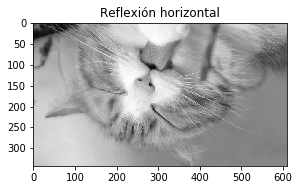

In [1]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np


#Lectura de la imagen de entrada
img =cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape
#print(filas)
#print(columnas)
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center =((columnas/2,filas/2))
#rotation_center = ((200,200))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Salida");

#Lectura de la imagen en escala de grises
img = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = rot.shape

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexión horizontal")

Text(0.5, 1.0, 'Reflexión vertical')

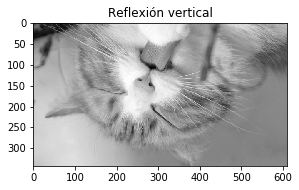

In [2]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
#Generar la matriz de reflexión en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación de reflexión Y a la imagen
ref_y = cv2.warpAffine(img,matriz_afin_ref_y,(columnas,filas))

fig = plt.figure(figsize=(10,12))
plt.subplot(2,2,3)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexión vertical")

En este punto se hace uso de las transformaciones basicas de rotación y reflexión

### Aplicando rotación inicialmente:
 
En este punto se inicia realizando una rotacion de 180 grados con centro de rotación en el centro de la imagen.
Para hacer esto se debe encontrar el centro de la imagen, y que coincida con el centro de rotación. De esta manera se asegura que todos los puntos sean visibles en la imagen rotada 180 grados.

Para realizar la reflexión se usa la matriz afin, debido a que es respecto al eje x, el termino (1,1) es igual a -1, y el término de traslacion en x (1,3) se deja igual al numero de columnas de la matriz de la imagen.


### Reflexión directamente:

Para realizar la reflexión se usa la matriz afin, debido a que es respecto al eje y, el termino (2,2) es igual a -1, y el término de traslacion en x (2,3) se deja igual al numero de filas de la matriz de la imagen.


Se puede ver que en ambos puntos se llegó a la misma imagen, pero en el primero esto se logró mediante más código. Es importante tener en cuenta diferentes operaciones o posibilidades para llegar a la imagen deseada, sobretodo cuando se vayan a realizar operaciones en muchas imagenes o en imagenes de gran tamaño y sea de interés tener el mínimo tiempo de computación posible.

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

Ayuda: Recuerde que la matriz afin de inclinación, viene dada por:

<img src = "res/mat.png">

Adicionalmente, recuerde que para aplicar la transformación afín sobre la imagen, puede utilizar la función de OpenCv, "cv2.warpAffine"

Text(0.5, 1.0, 'Imagen Salida')

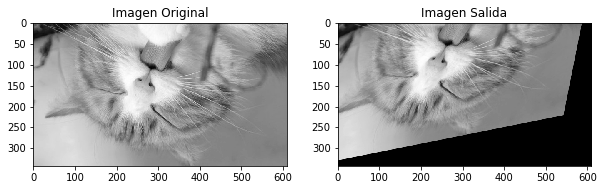

In [3]:
#Lectura de imagen de entrada y obtención de filas y columnas
filas,columnas = ref_y.shape

#Con base en la teoría, crear la matriz M de inclinación
#reemplazando los valores b y d
inc_x = -0.2
inc_y = -0.2
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen leída 
res = cv2.warpAffine(ref_y,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(ref_y,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

### Inclinación

Para la inclinación se hace también uso de la matriz afin, esta vez cambiando las posiciones (1,2) para la inclinación en x y (2,1) para inclinación en y.


La inclinación permite simular una perspectiva, una aplicación de esta transformación es en los escáners para documentos, en los que se busca llevar fotos en perspectiva a que parezcan haber sido tomadas desde arriba y centrales. En estos casos, la matriz afín cuenta con una tercera fila en la que se hace la inclinación en el eje z.

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

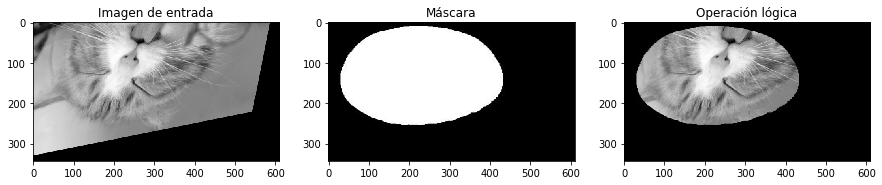

In [4]:
#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/mascara2.png', cv2.IMREAD_GRAYSCALE)/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (res.shape[1], res.shape[0]))
#out = img * np.logical_and(img, np.logical_not(mascara))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = res * mascara
out = out/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(res, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

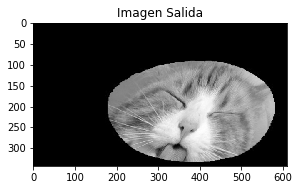

In [5]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
#print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(out,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Salida");

[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


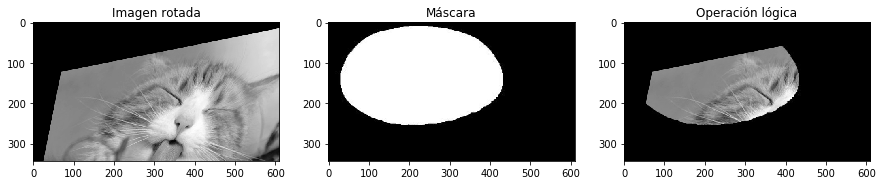

In [6]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(res,matriz_afin_rot,(columnas,filas))





#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/mascara2.png', cv2.IMREAD_GRAYSCALE)/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (res.shape[1], res.shape[0]))
#out = img * np.logical_and(img, np.logical_not(mascara))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = rot * mascara
out = out/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen rotada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(rot, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

Para aplicar la máscara primero se debe asegurar que sea del mismo tamaño que la imagen de entrada.

Las imagenes obtenidas al rotar la imagen antes y después de aplicar la máscara son diferentes.

Esto es porque la máscara también debe rotar para llegar a la imagen deseada, operación que se realiza a continuación.



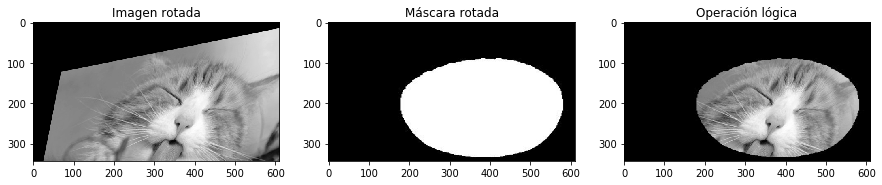

In [7]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)


#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(res,matriz_afin_rot,(columnas,filas))


#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/mascara2.png', cv2.IMREAD_GRAYSCALE)/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (res.shape[1], res.shape[0]))


#Máscara rotada

mascara = cv2.warpAffine(mascara,matriz_afin_rot,(columnas,filas))

#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = rot * mascara
out = out/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen rotada')
ax2.set_title('Máscara rotada')
ax3.set_title('Operación lógica')
ax1.imshow(rot, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')


# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

C:\Users\Daniela\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


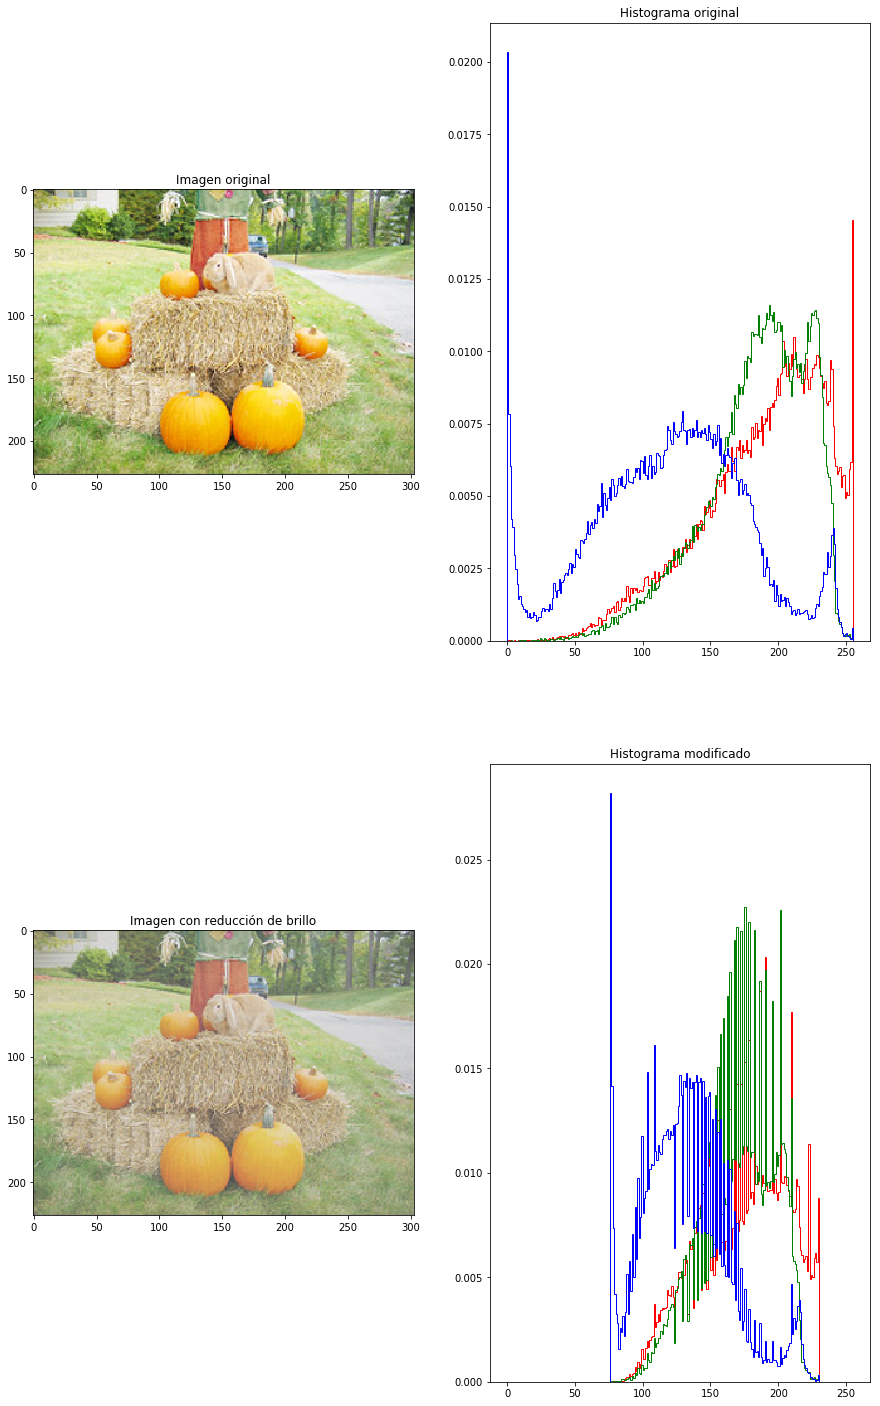

In [8]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def func_exp(img, a, b, c):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.astype(np.float32)/255.0
    
    
    resmulti = cv2.multiply(img_copy, b)
    
    resuma = cv2.add(resmulti, c)
    resexp = np.exp(resuma)
    
    res = cv2.multiply(resexp, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    #print(res)
    res = res*255
    res[res>255] = 255
    
    res = res.astype(np.uint8)
   # print(res)
    
    return res

#Leer la imagen de entrada
#cv2.COLOR_BGR2RGB
img = cv2.cvtColor(cv2.imread('res/calabazas.png'),cv2.COLOR_BGR2RGB)

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 0.3
b = 1.1
c = 0

res_oscuro = apply_f_on_rgb(img, func_exp, [a, b, c])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[1,0].set_title('Imagen con reducción de brillo')
arreglo_plots[1,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i]);

El resultado de aplicar esta operación no lineal depende de los valores que se le asignen a a,b y c; pero en general se obtiene una imagen con menor contraste, en la que el histograma obtenido se comprime.

### Variación de a:

a controla el brillo en la imagen. 
A menor a, menor es el brillo y menor es el contraste. En el caso de b=1.1 y c=0, los colores de la imagen se saturan a partir de a=0.5.

### Variación de b:

b controla el contraste en la imagen.
Mientras menor es b, más comprimido es el histograma. Al varia b y que los otros parámetros permanezcan constantes se extiende o comprime el histograma pero siempre comienza desde el mismo punto. Ejemplo, para a=0.3 y c=0, se empiezan a tener valores en el histograma aproximadamente en 75, para b=0.2 el histograma llega hasta 90 y para b=1.1 llega a 230.

### Variación de c:

c controla también el brillo de la imagen. 
Junto con a, define el punto donde comienza el histograma. También afecta el punto hasta donde llega el histograma, este efecto incrementa significativamente a medida que afecta c. 
Ejemplo, para a=0.3 y b=0.8:
    c=0, el histograma va desde 70 hasta 170 aproximadamente
    c=0.1, el histograma va desde 90 hasta 190 aproximadamente
    c=0.3, el histograma va desde 100 hasta 240 aproximadamente


## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = "res/expo.png">

<br><b>Ecualización de Rayleigh</b></br>

<img src = "res/ray.png">

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

#### Ecualizacion exponencial

C:\Users\Daniela\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log
C:\Users\Daniela\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


<Figure size 432x288 with 0 Axes>

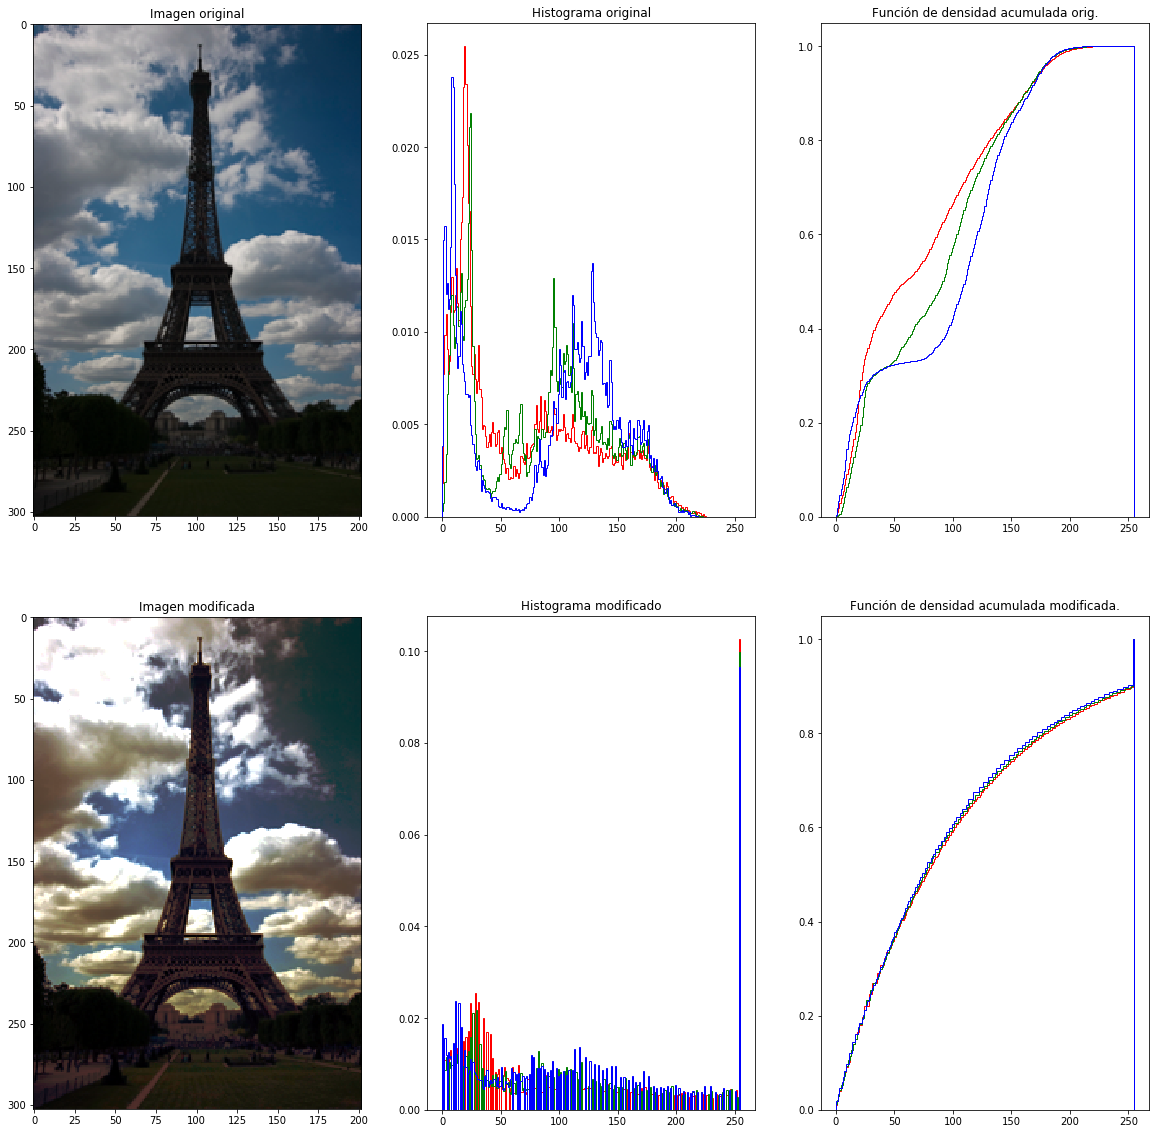

In [9]:
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img,a):
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = -gmin-(1/a)*np.log(1-cdf[g])*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
#Definimos el parametro alpha para aplicar la transformacion
a = 2
res = apply_f_on_rgb(img, histogram_equalization, [a])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


### Ecualización de Rayleigh

C:\Users\Daniela\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log
C:\Users\Daniela\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


<Figure size 432x288 with 0 Axes>

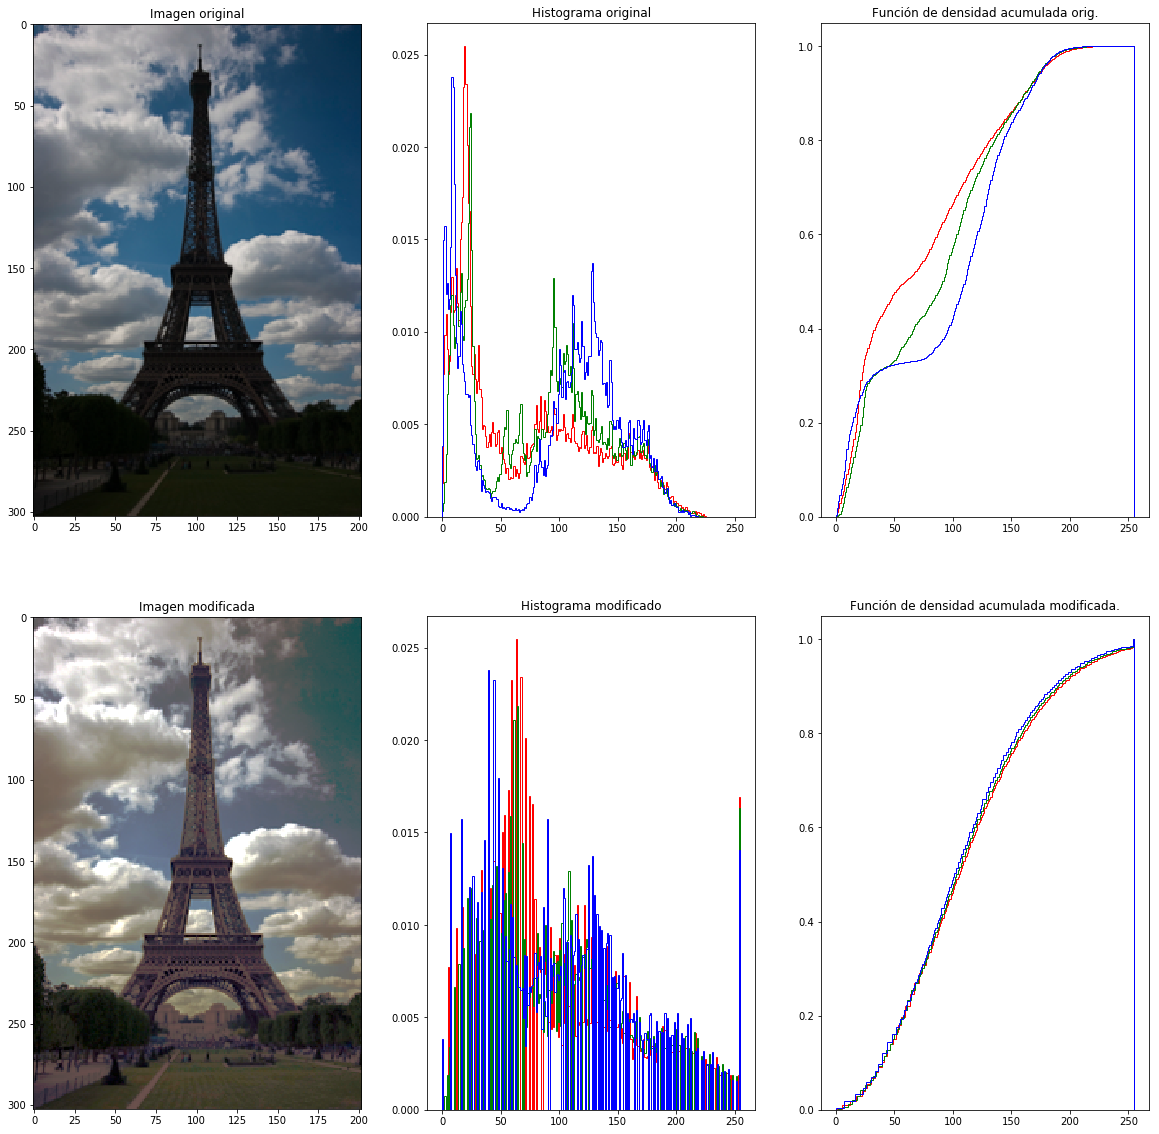

In [10]:
#Importar librerias
%matplotlib inline 
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img,a):
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = gmin+math.sqrt(-2*(a**2)*np.log(1-cdf[g]))*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
#Definimos el parametro alpha para aplicar la transformacion
a = 0.4
res = apply_f_on_rgb(img, histogram_equalization, [a])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

Mediante la ecualización de histograma logramos mejorar el contraste de la imagen.

Se busca obtener un histograma con una distribución uniforme, es decir, que exista el mismo numero de pixeles por cada nivel de gris.

En este punto se trabaja con dos tipos de ecualización, dependiendo de la forma deseada del histograma:

### Ecualización exponencial:

El valor del parámetro a define la forma del histograma.

Mientras más pequeño es a, menor será la pendiente de la función de densidad acumulada, es decir, mayor proporción de pixeles tendrán mayor nivel de intensidad.
Por el contrario, a medida que aumenta a, aumenta la densidad de pixeles con intensidades bajas.


### Ecualización Rayleigh:


La forma de su histograma depende también del valor del parámetro a.

A medida que a se aproxima a 0, el histograma se convierte en una campana más pronunciada. Por el contrario, cuando a aumenta, el histograma se distribuye más en todos los valores de intensidad.





## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

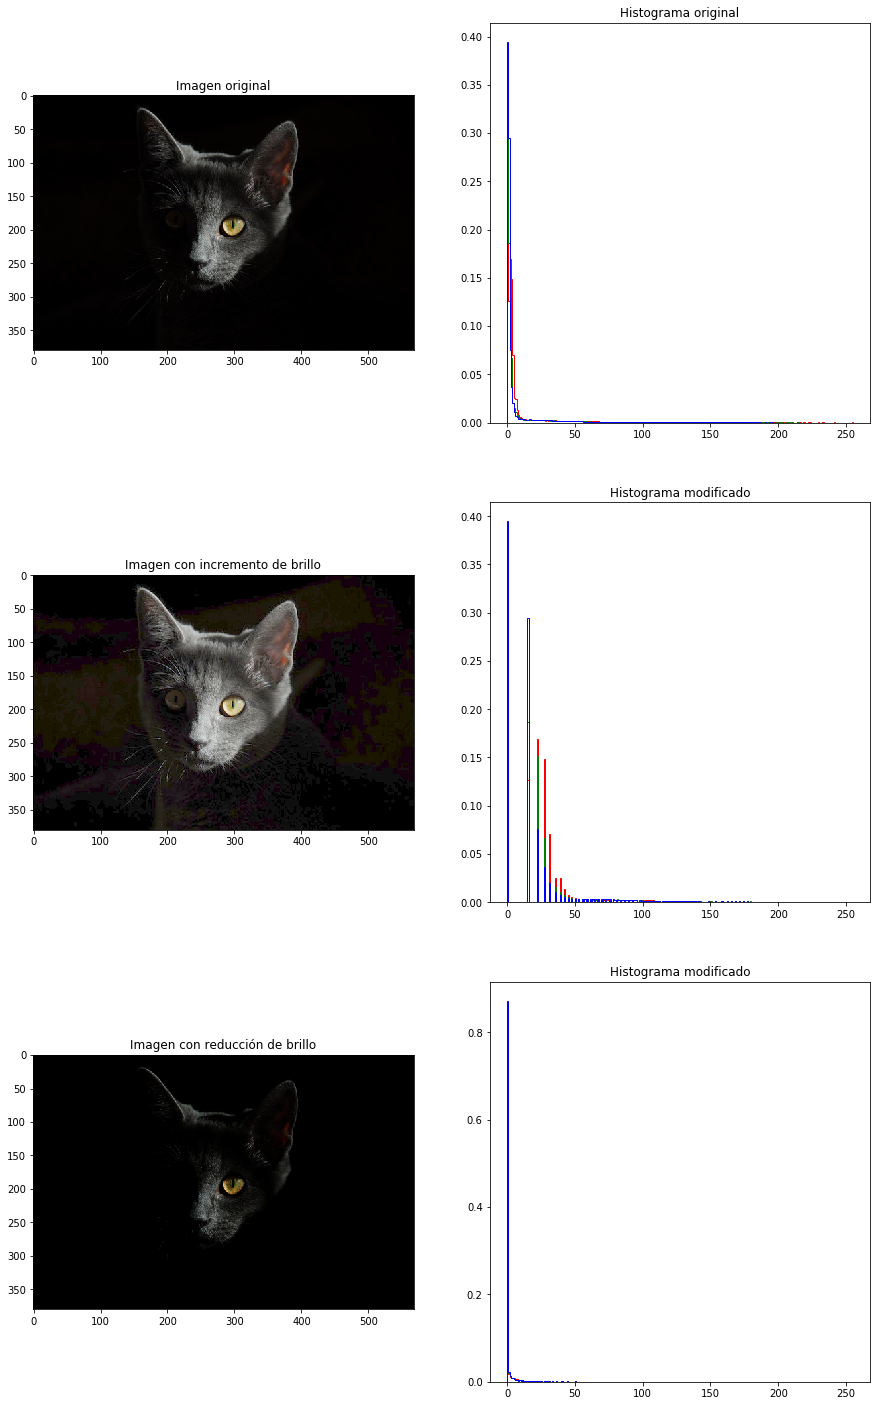

In [12]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 2

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

La transformación gamma se usa para manipular el contraste de la imagen y realzarla. 

Si gamma está entre 0 y 1, la imagen será mas clara, por el contrario si el parámetro gamma es mayor que 1 se obtendran tonos más oscuros.

a es un parámetro entre 0 y 1, entre mayor es a, mayor es el contraste en la imagen, mayor es el realce.

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

El resultado de aplicar la convolución en img(1,1) es: 253


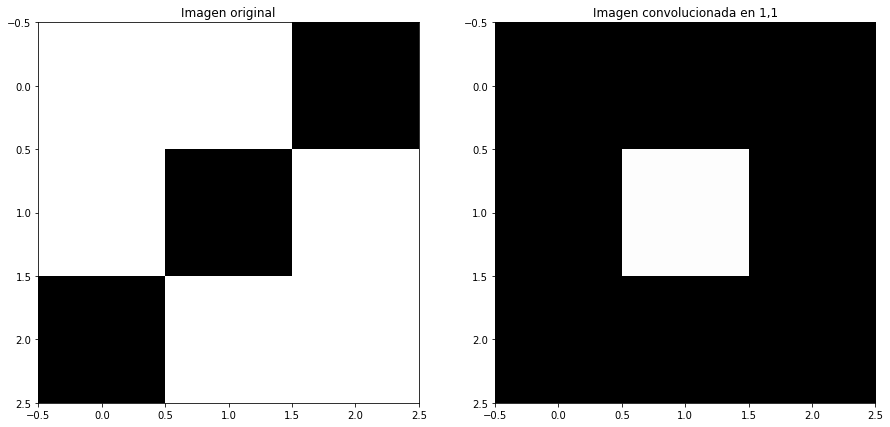

In [120]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Imagen de entrada, creada artificialmente
img = np.array([[255,255,0],
              [255,0,255],
              [0,255,255]], dtype=np.uint8)

#Posición (x,y)
x = 1
y = 1

#Máscara de convolución
w = np.array([[1/2,1/2,1/2],
              [1/2,1/2,1/2],
              [1/2,1/2,1/2]], dtype=np.float64)

k = 1 #el radio del kernel

#Crear una matriz de ceros del mismo tamaño de la imagen de entrada, datos flotantes
res = np.zeros(img.shape, dtype=np.float64)

#Recorrer todos los valores i,j de la imagen, en el intervalo del radio del kernel
for i in range(-k, k+1):
    for j in range(-k, k+1):
        #Resultado de la convolución en la posición 1,1
        res[1][1] += img[x+i][y+j] * w[k+i][k+j]
        #print(res[1][1])
              

#Volver al tipo de dato uint8
res=res.astype(np.uint8)

print("El resultado de aplicar la convolución en img(1,1) es:", res[1][1])

#Generar subplot 1x2 para mostrar imagen original y convolucionada en 1,1
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada en 1,1')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

La convolucion es una transformación en la que el valor del pixel resultante es una combinacion lineal de los valores de los pixeles vecinos en la imagen.

Al realizar la opeación de convolución para el punto 1,1 se obtiene el valor de 765.0, pero la operación de conversión a uint8 lleva este valor a la escala de 0-255, de aquí se obtiene el valor de intensidad de 253 visible en la imagen.